In [1]:
import os
data_file_path = "data/"

dir_list = os.listdir(data_file_path)

In [2]:
dir_list_by_parameter = list(map(lambda x: x.split(":"), dir_list))

# dir_list_by_parameter[0]
# ['g_16000', 'p_10', 'wc_10', 'gs_42', 'ss_10', 'ipmutp_0.01', 'icmutp_0.005', 'icmaxsw_5', 'ccmutp_0.01.csv']
VARIABLE_A_INDEX = 8
VARIABLE_B_INDEX = 3

# extract unique numbers (ipmutp) and seeds
unique_ip_mut = set()
unique_seeds = set()
for i in range(len(dir_list_by_parameter)):
  unique_ip_mut.add(dir_list_by_parameter[i][VARIABLE_A_INDEX].split("_")[1])
  unique_seeds.add(dir_list_by_parameter[i][4].split("_")[1])

print(f"{len(unique_ip_mut)}, {len(unique_seeds)}")

15, 40


In [3]:
import pandas as pd

max_iters = 1500

fdf = pd.DataFrame()
for file in dir_list:
  ip_mut = float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1])
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed not in [1]:
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  fdf = pd.concat((fdf, df[:max_iters]))

fdf.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut,gseed
count,112500.00000,112500.000000,112500.000000,1.125000e+05,1.125000e+05,112500.0,112500.000000,112500.00000
mean,749.50000,38600.463226,3596.795039,1.567051e+08,6.948910e+07,1.0,0.097067,44.00000
std,433.01453,8071.028763,1174.534644,7.355419e+07,3.150236e+07,0.0,0.093369,1.41422
min,0.00000,19916.023884,1312.674104,2.694440e+07,2.677733e+07,1.0,0.001000,42.00000
25%,374.75000,34801.401043,2748.154395,1.008028e+08,5.549216e+07,1.0,0.008000,43.00000
50%,749.50000,40104.546502,3468.902461,1.467128e+08,6.503022e+07,1.0,0.080000,44.00000
75%,1124.25000,43752.896246,4295.078616,2.013039e+08,7.886525e+07,1.0,0.160000,45.00000
max,1499.00000,67994.952641,10464.103975,6.016123e+08,3.099091e+08,1.0,0.300000,46.00000


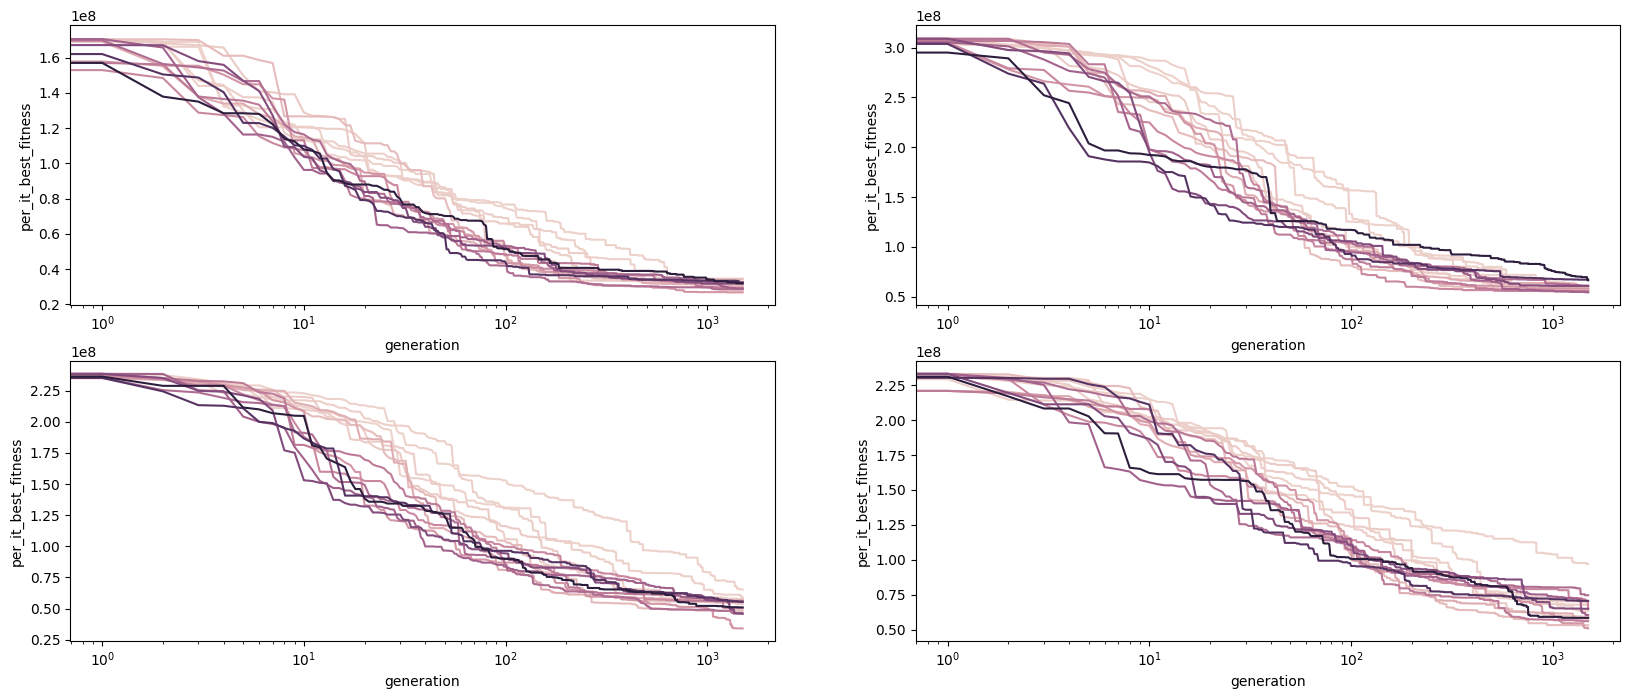

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

cfdf_43 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 43").df()
cfdf_44 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 44").df()
cfdf_45 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 45").df()
cfdf_46 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 46").df()

ax = sns.lineplot(ax=axs[0][0], data=cfdf_43, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[0][1], data=cfdf_44, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[1][0], data=cfdf_45, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[1][1], data=cfdf_46, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")

fig.savefig("konvergencna_krivka.png") 


In [5]:
import numpy as np

max_iters = 250

fdf2 = pd.DataFrame()

probs = np.array([0.001, 0.002, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.20, 0.25, 0.3])

for file in dir_list:
  ip_mut = round(float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1]), 3)
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.replace(".csv", "").split(":")[4].split("_")[1])

  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  df['ic_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,gseed,ic_mut
count,3000.0,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,250.0,40416.797622,3711.518646,1.671886e+08,7.809267e+07,20.500000,44.000000,0.097067
std,0.0,7358.697780,1151.936991,7.375247e+07,2.423324e+07,11.545321,1.414449,0.093384
min,250.0,22590.526242,1493.134590,3.540258e+07,2.866679e+07,1.000000,42.000000,0.001000
25%,250.0,39287.296065,2870.596374,1.117719e+08,6.675076e+07,10.750000,43.000000,0.008000
50%,250.0,42525.613656,3565.597201,1.587282e+08,7.860898e+07,20.500000,44.000000,0.080000
75%,250.0,45117.436711,4419.501710,2.120070e+08,9.079681e+07,30.250000,45.000000,0.160000
max,250.0,57375.402171,8128.819756,4.934252e+08,1.851246e+08,40.000000,46.000000,0.300000


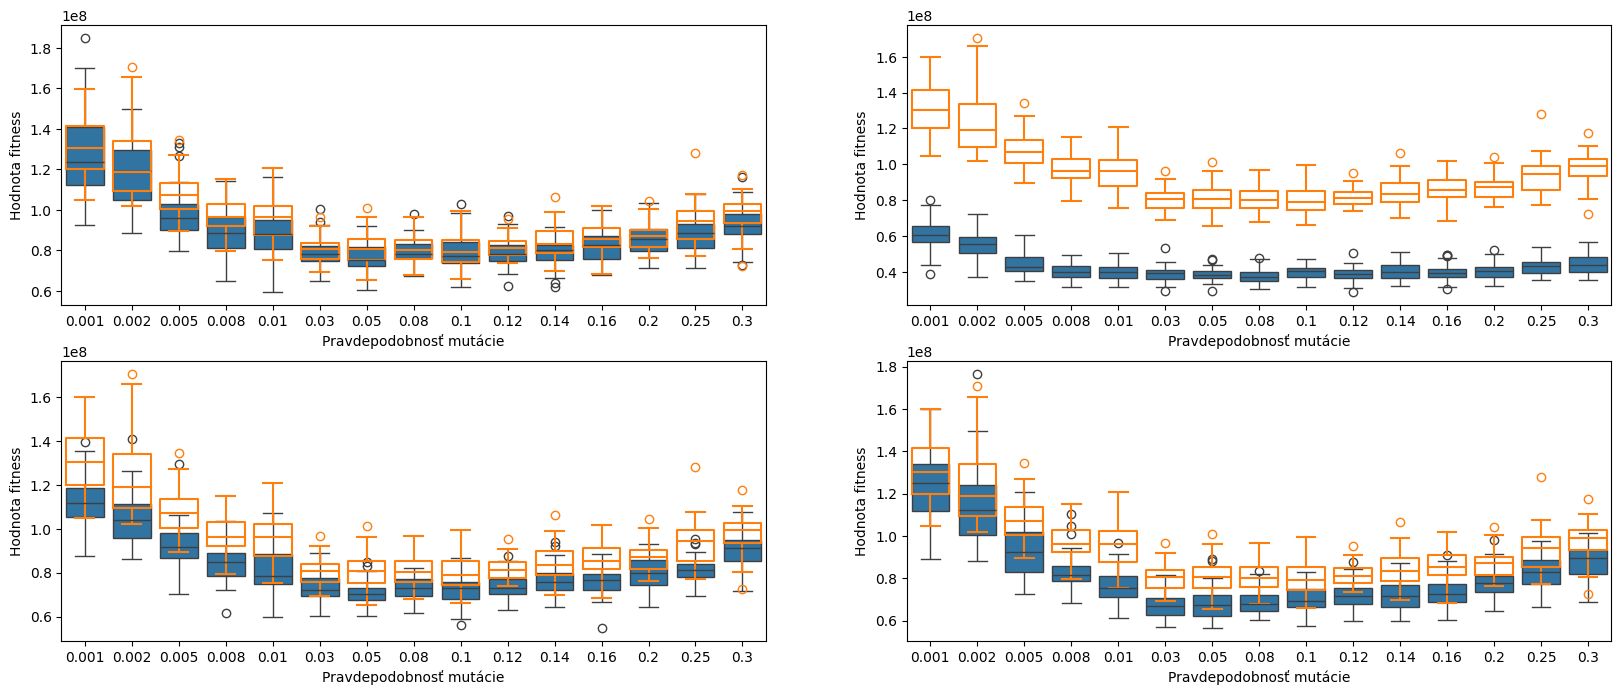

In [14]:
import duckdb

gsd42 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 42").df()
gsd43 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 43").df()
gsd44 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 44").df()
gsd45 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 45").df()
gsd46 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 46").df()


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.boxplot(ax=axs[0][1], data=gsd43, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][0], data=gsd44, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][1], data=gsd45, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[0][0], data=gsd46, x="ic_mut", y="per_it_best_fitness")

sns.boxplot(ax=axs[0][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[0][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)

for i in range(2):
  for j in range(2):
    axs[i][j].set_xlabel("Pravdepodobnosť mutácie")
    axs[i][j].set_ylabel("Hodnota fitness")

plt.show()

fig.savefig("boxplot_start.png") 

In [ ]:
import numpy as np

max_iters = 1499

fdf2 = pd.DataFrame()

probs = np.array([0.001, 0.002, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.20, 0.25, 0.3])
# ic_swap_qs = np.array([2, 3, 4, 5])

for file in dir_list:
  ip_mut = round(float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1]), 3)
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.replace(".csv", "").split(":")[4].split("_")[1])
    
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  df['ic_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,gseed,ic_mut
count,3000.0,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,1499.0,36515.066788,3524.210345,1.467814e+08,5.622178e+07,20.500000,44.000000,0.097067
std,0.0,6680.657993,1202.253223,6.858763e+07,1.426374e+07,11.545321,1.414449,0.093384
min,1499.0,19221.814092,1301.448102,2.595899e+07,2.235405e+07,1.000000,42.000000,0.001000
25%,1499.0,34785.313244,2653.700403,9.442121e+07,5.028284e+07,10.750000,43.000000,0.008000
50%,1499.0,38523.202800,3335.888690,1.369696e+08,5.962898e+07,20.500000,44.000000,0.080000
75%,1499.0,41024.634976,4196.252063,1.867186e+08,6.554133e+07,30.250000,45.000000,0.160000
max,1499.0,49173.490886,8817.635538,4.811367e+08,1.039660e+08,40.000000,46.000000,0.300000


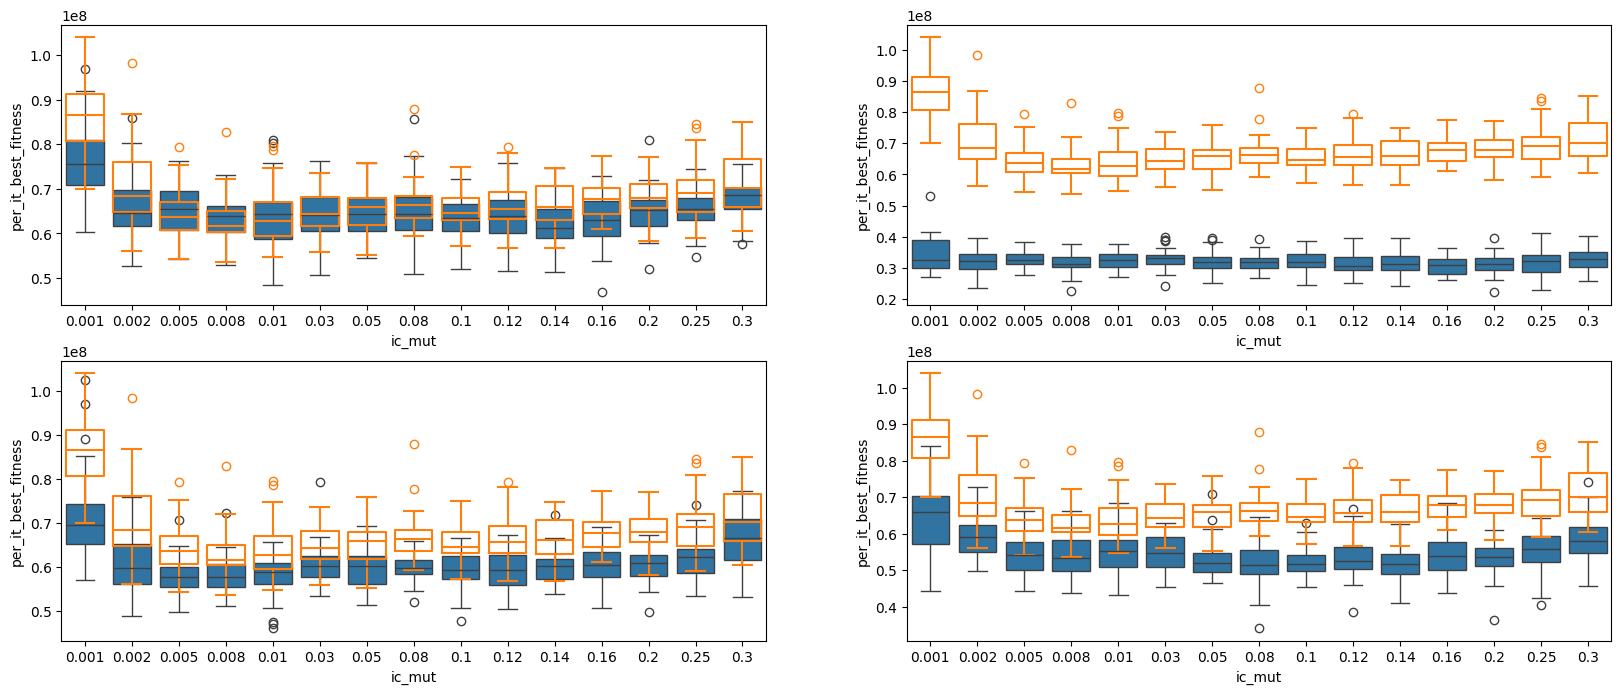

In [ ]:
import duckdb

gsd42 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 42").df()
gsd43 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 43").df()
gsd44 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 44").df()
gsd45 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 45").df()
gsd46 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 46").df()


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.boxplot(ax=axs[0][1], data=gsd43, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][0], data=gsd44, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][1], data=gsd45, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[0][0], data=gsd46, x="ic_mut", y="per_it_best_fitness")

sns.boxplot(ax=axs[0][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[0][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)

plt.show()

fig.savefig("boxplot_end.png") 